In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

In [2]:
def predict_images_128(csv_path, model_path, label_names):
    # Load the model
    model = load_model(model_path)

    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Initialize an empty list to store the results
    results = []

    # Loop through the rows in the CSV file
    for idx, row in df.iterrows():
        # Load the image and preprocess it
        img_path = row['name']
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        # Make the prediction
        pred = model.predict(img)[0]

        # Get the predicted label and probability
        max_prob_index = np.argmax(pred)
        label = label_names[max_prob_index]
        prob = round(pred[max_prob_index] * 100, 2)

        # Append the results to the list
        results.append([img_path,row['label'], label, prob])

    # Convert the results list to a pandas dataframe and return it
    df = pd.DataFrame(results, columns=['image_file', 'correct_label', 'predicted_label', 'prediction_probability'])
    return df

In [3]:
def predict_images_224(csv_path, model_path, label_names):
    # Load the model
    model = load_model(model_path)

    # Load the CSV file
    df = pd.read_csv(csv_path)

    # Initialize an empty list to store the results
    results = []

    # Loop through the rows in the CSV file
    for idx, row in df.iterrows():
        # Load the image and preprocess it
        img_path = row['name']
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        # Make the prediction
        pred = model.predict(img)[0]

        # Get the predicted label and probability
        max_prob_index = np.argmax(pred)
        label = label_names[max_prob_index]
        prob = round(pred[max_prob_index] * 100, 2)

        # Append the results to the list
        results.append([img_path,row['label'], label, prob])

    # Convert the results list to a pandas dataframe and return it
    df = pd.DataFrame(results, columns=['image_file', 'correct_label', 'predicted_label', 'prediction_probability'])
    return df

In [4]:
def calculate_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return precision, recall, f1_score, accuracy

In [5]:
csv_path  = 'test_sample_df.csv'
csv_path  = 'val_sample_df.csv'

## MODEL 1

#### MODEL 1 (128, 128, 3)

In [6]:
model_path = 'train_w_model01A/wHC_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_1 = predict_images_128(csv_path, model_path, label_names)

In [58]:
df_1.to_csv('preds_df/df_1.csv', index=False)

In [9]:
threshold = 0.7  # example threshold value

tp = len(df_1.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_1.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_1.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_1.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [10]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_1 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 1 (128x128)'])

# Print the dataframe
metrics_1

,Model 1 (128x128)
Accuracy,0.356452
Precision,0.356452
Recall,1.000000
F1 Score,0.525565


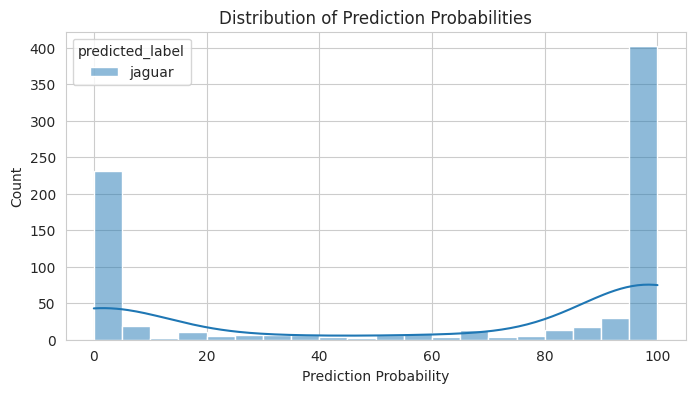

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_1, x=df_1['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

#### MODEL 1 (224, 224, 3)

In [12]:
model_path_1 = 'train_w_model01A/wHC_1_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_1_1 = predict_images_224(csv_path, model_path_1, label_names)

In [59]:
df_1_1.to_csv('preds_df/df_1_1.csv', index=False)

In [14]:
threshold = 0.7  

tp = len(df_1_1.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_1_1.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_1_1.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_1_1.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [15]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_1_1 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 1 (224x224)'])

# Print the dataframe
metrics_1_1

,Model 1 (224x224)
Accuracy,0.392966
Precision,0.392966
Recall,1.000000
F1 Score,0.564215


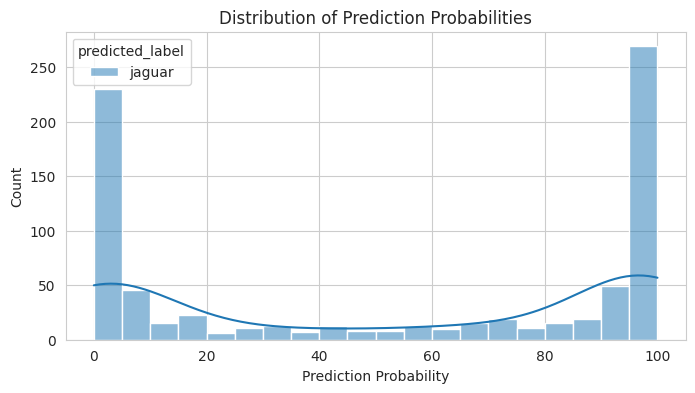

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_1_1, x=df_1_1['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

## MODEL 2

#### MODEL 2 (128, 128, 3)

In [17]:
model_path = 'train_w_model02A/wHC_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_2 = predict_images_128(csv_path, model_path, label_names)

In [60]:
df_2.to_csv('preds_df/df_2.csv', index=False)

In [20]:
threshold = 0.7  # example threshold value

tp = len(df_2.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_2.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_2.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_2.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [21]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_2 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 2 (128x128)'])

# Print the dataframe
metrics_2

,Model 2 (128x128)
Accuracy,0.500000
Precision,0.500000
Recall,1.000000
F1 Score,0.666667


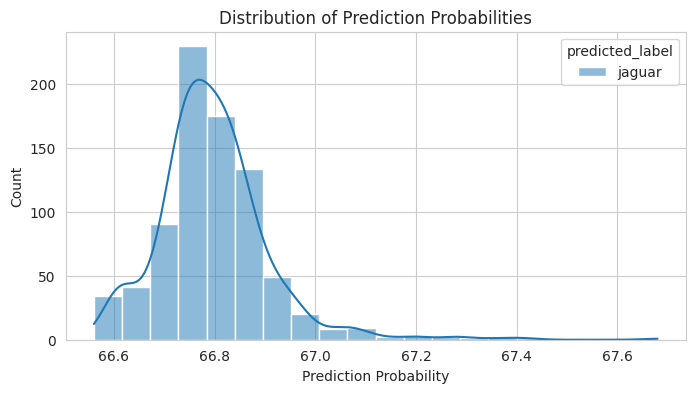

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_2, x=df_2['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

#### MODEL 2 (224, 224, 3)

In [23]:
model_path = 'train_w_model02A/wHC_1_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_2_1 = predict_images_224(csv_path, model_path, label_names)

In [61]:
df_2_1.to_csv('preds_df/df_2_1.csv', index=False)

In [26]:
threshold = 0.7  # example threshold value

tp = len(df_2_1.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_2_1.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_2_1.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_2_1.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [27]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_2_1 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 2 (224x224)'])

# Print the dataframe
metrics_2_1

,Model 2 (224x224)
Accuracy,0.500000
Precision,0.500000
Recall,1.000000
F1 Score,0.666667


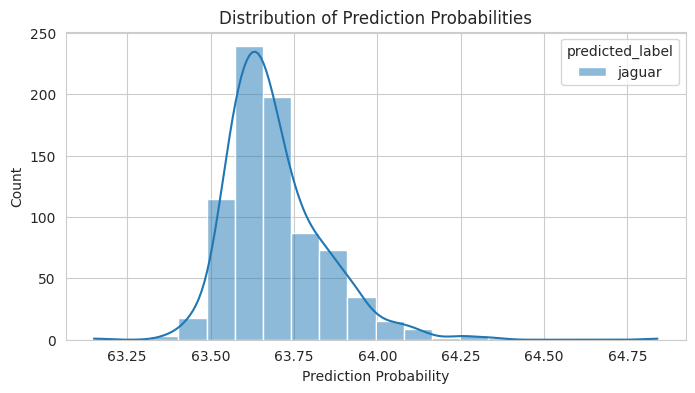

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_2_1, x=df_2_1['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

## MODEL 3

#### MODEL 3 (128, 128, 3)

In [29]:
model_path = 'train_w_model03E/wHC_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_3 = predict_images_128(csv_path, model_path, label_names)

In [62]:
df_3.to_csv('preds_df/df_3.csv', index=False)

In [32]:
threshold = 0.7  # example threshold value

tp = len(df_3.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_3.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_3.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_3.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [33]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_3 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 3 (128x128)'])

# Print the dataframe
metrics_3

,Model 3 (128x128)
Accuracy,0.759082
Precision,0.759082
Recall,1.000000
F1 Score,0.863043


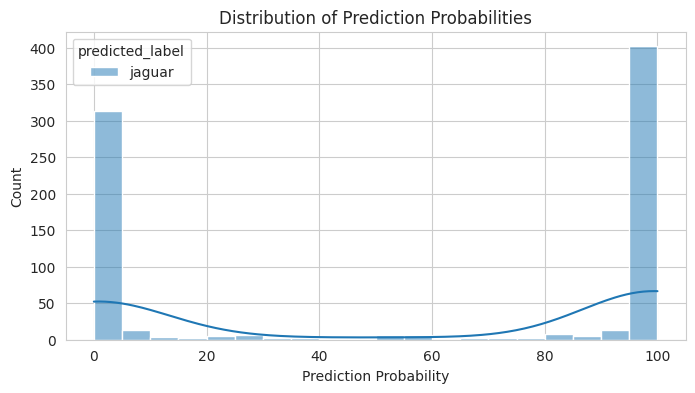

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_3, x=df_3['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

#### MODEL 3 (224, 224, 3)

In [35]:
model_path = 'train_w_model03E/wHC_1_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_3_1 = predict_images_224(csv_path, model_path, label_names)

In [63]:
df_3_1.to_csv('preds_df/df_3_1.csv', index=False)

In [38]:
threshold = 0.7  # example threshold value

tp = len(df_3_1.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_3_1.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_3_1.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_3_1.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [39]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_3_1 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 3 (224x224)'])

# Print the dataframe
metrics_3_1

,Model 3 (224x224)
Accuracy,0.845316
Precision,0.845316
Recall,1.000000
F1 Score,0.916175


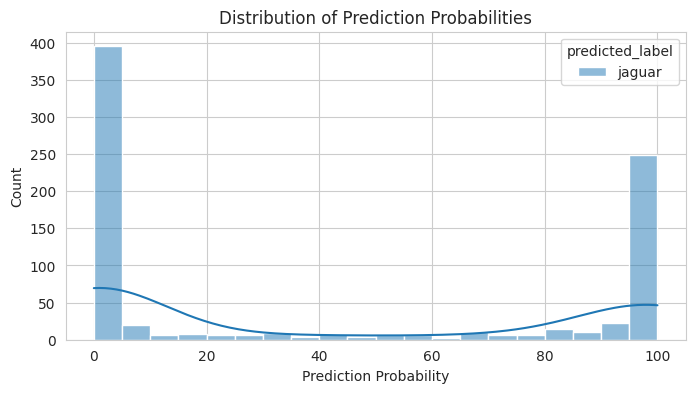

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_3_1, x=df_3_1['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

## MODEL 3v2

#### MODEL 3v2 (128, 128, 3)

In [41]:
model_path = 'train_w_model03v2/wHC_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_results = predict_images_128(csv_path, model_path, label_names)

In [ ]:
df_3v2 = df_results

In [64]:
df_3v2.to_csv('preds_df/df_3v2.csv', index=False)

In [44]:
threshold = 0.7  # example threshold value

tp = len(df_3v2.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_3v2.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_3v2.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_3v2.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [45]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_3v2 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 3v2 (128x128)'])

# Print the dataframe
metrics_3v2

,Model 3v2 (128x128)
Accuracy,0.855792
Precision,0.940260
Recall,0.905000
F1 Score,0.922293


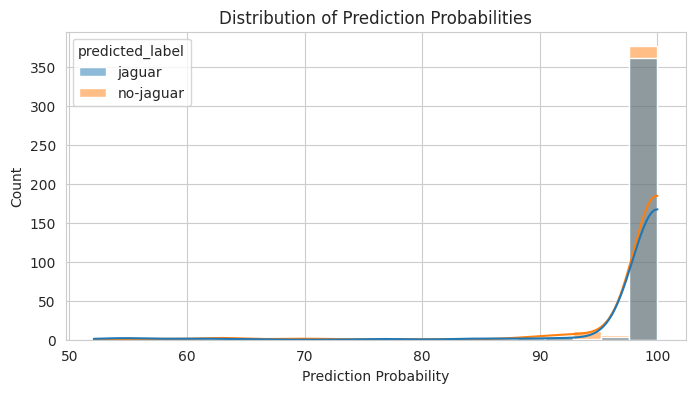

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_3v2, x=df_3v2['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

#### MODEL 3v2 (224, 224, 3)

In [47]:
model_path = 'train_w_model03v2/wHC_1_1.h5'
label_names = ['jaguar', 'no-jaguar']

In [ ]:
df_3v2_1 = predict_images_224(csv_path, model_path, label_names)

In [65]:
df_3v2_1.to_csv('preds_df/df_3v2_1.csv', index=False)

In [50]:
threshold = 0.7  # example threshold value

tp = len(df_3v2_1.query("correct_label == 'jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
tn = len(df_3v2_1.query("correct_label == 'no-jaguar' and predicted_label == 'no-jaguar' and prediction_probability < @threshold"))
fp = len(df_3v2_1.query("correct_label == 'no-jaguar' and predicted_label == 'jaguar' and prediction_probability >= @threshold"))
fn = len(df_3v2_1.query("correct_label == 'jaguar' and predicted_label == 'no-jaguar' and prediction_probability >= @threshold"))


In [51]:
# Calculate the metrics
precision, recall, f1_score, accuracy = calculate_metrics(tp, tn, fp, fn)

# Create a dictionary with the metric values
metrics_dict = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}

# Convert the dictionary to a pandas dataframe
metrics_3v2_1 = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Model 3v2 (224x224)'])

# Print the dataframe
metrics_3v2_1

,Model 3v2 (224x224)
Accuracy,0.883991
Precision,0.924757
Recall,0.952500
F1 Score,0.938424


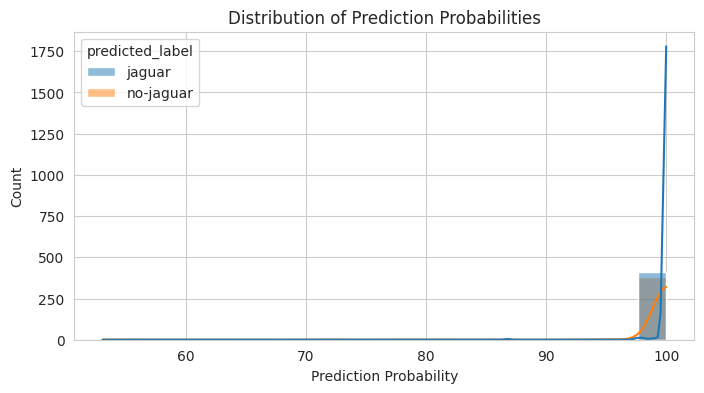

In [52]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

sns.histplot(data=df_3v2_1, x=df_3v2_1['prediction_probability'], hue='predicted_label', bins=20, kde=True)
plt.xlabel('Prediction Probability')
plt.ylabel('Count')
plt.title('Distribution of Prediction Probabilities')

plt.show()

## Final results

In [53]:
# Create a list of dataframes
dfs = [metrics_1, metrics_1_1, metrics_2, metrics_2_1, metrics_3, metrics_3_1, metrics_3v2, metrics_3v2_1]

# Create a list of model names
models = ['Model 1 (128x128)', 'Model 1 (224x224)', 'Model 2 (128x128)', 'Model 2 (224x224)', 'Model 3 (128x128)', 'Model 3 (224x224)', 'Model 3v2 (128x128)', 'Model 3v2 (224x224)']

# Concatenate the dataframes along the columns axis, using the 'models' list as the keys
df_concat = pd.concat(dfs, axis=1, keys=models)

# Group the dataframe by the 'model' column and calculate the mean of the metrics
df_grouped = df_concat.groupby(level=0, axis=1).mean()

# Transpose the dataframe to have the 'model' column as the index
df_metrics = df_grouped.T

# Print the resulting dataframe
print(df_metrics)


                     Accuracy  Precision  Recall  F1 Score
Model 1 (128x128)    0.356452   0.356452  1.0000  0.525565
Model 1 (224x224)    0.392966   0.392966  1.0000  0.564215
Model 2 (128x128)    0.500000   0.500000  1.0000  0.666667
Model 2 (224x224)    0.500000   0.500000  1.0000  0.666667
Model 3 (128x128)    0.759082   0.759082  1.0000  0.863043
Model 3 (224x224)    0.845316   0.845316  1.0000  0.916175
Model 3v2 (128x128)  0.855792   0.940260  0.9050  0.922293
Model 3v2 (224x224)  0.883991   0.924757  0.9525  0.938424


In [54]:
df_metrics

,Accuracy,Precision,Recall,F1 Score
Model 1 (128x128),0.356452,0.356452,1.0000,0.525565
Model 1 (224x224),0.392966,0.392966,1.0000,0.564215
Model 2 (128x128),0.500000,0.500000,1.0000,0.666667
Model 2 (224x224),0.500000,0.500000,1.0000,0.666667
Model 3 (128x128),0.759082,0.759082,1.0000,0.863043
Model 3 (224x224),0.845316,0.845316,1.0000,0.916175
Model 3v2 (128x128),0.855792,0.940260,0.9050,0.922293
Model 3v2 (224x224),0.883991,0.924757,0.9525,0.938424


In [55]:
sorted_metrics_df = df_metrics.sort_values(by='F1 Score', ascending=False)
sorted_metrics_df

,Accuracy,Precision,Recall,F1 Score
Model 3v2 (224x224),0.883991,0.924757,0.9525,0.938424
Model 3v2 (128x128),0.855792,0.940260,0.9050,0.922293
Model 3 (224x224),0.845316,0.845316,1.0000,0.916175
Model 3 (128x128),0.759082,0.759082,1.0000,0.863043
Model 2 (128x128),0.500000,0.500000,1.0000,0.666667
Model 2 (224x224),0.500000,0.500000,1.0000,0.666667
Model 1 (224x224),0.392966,0.392966,1.0000,0.564215
Model 1 (128x128),0.356452,0.356452,1.0000,0.525565


In [56]:
sorted_metrics_df.to_csv('sorted_metrics_test.csv', index=True)

In [66]:
!zip -r preds_df.zip preds_df


  adding: preds_df/ (stored 0%)
  adding: preds_df/df_1.csv (deflated 92%)
  adding: preds_df/df_1_1.csv (deflated 92%)
  adding: preds_df/df_2.csv (deflated 93%)
  adding: preds_df/df_2_1.csv (deflated 93%)
  adding: preds_df/df_3.csv (deflated 94%)
  adding: preds_df/df_3_1.csv (deflated 93%)
  adding: preds_df/df_3v2.csv (deflated 94%)
  adding: preds_df/df_3v2_1.csv (deflated 95%)
